In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

In [2]:
df_oct = pd.read_csv('COVID_Cases_Restricted_Detailed_10312020.csv')
df_oct.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-08-26,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
1,"White, Non-Hispanic",Laboratory-confirmed case,2020-08-23,Male,2020-07-07,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
2,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-09-02,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
3,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-09-01,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
4,"White, Non-Hispanic",Laboratory-confirmed case,2020-09-18,Male,2020-09-01,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years


In [29]:
df_oct_lab_confirmed = df_oct.loc[df_oct['current_status'] == 'Laboratory-confirmed case']
df_oct_lab_confirmed['death_yn'].value_counts()

No         2562482
Missing    2150369
Unknown     601828
Yes         148099
Name: death_yn, dtype: int64

In [37]:
df_death_grouped_age = df_oct_lab_confirmed.loc[df_oct_lab_confirmed['death_yn'] == 'Yes']
df_death_grouped_age = df_death_grouped_age[['current_status','age_group']].groupby('age_group').count()
df_death_grouped_age

,current_status
age_group,
0 - 9 Years,49
10 - 19 Years,93
20 - 29 Years,674
30 - 39 Years,1841
40 - 49 Years,4465
50 - 59 Years,11513
60 - 69 Years,24589
70 - 79 Years,36445
80+ Years,67296


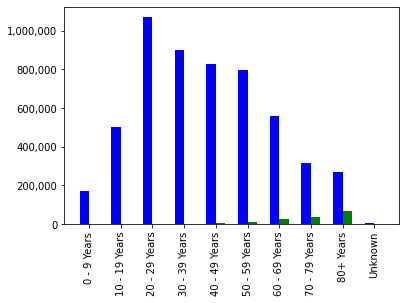

In [42]:
df_confirmed_grouped_age = df_oct_lab_confirmed[['current_status','age_group']].groupby('age_group').count()
names = df_confirmed_grouped_age.index
values = df_confirmed_grouped_age['current_status']
deaths = df_death_grouped_age['current_status']

x = np.arange(10)
fig, ax = plt.subplots()
#plt.xticks(rotation=90)
w = 0.3
plt.xticks(x + w /2, names, rotation='vertical')
ax.bar(x, values, width=w, color='b', align='center')
#ax1 = ax.twinx()
ax.bar(x + w, deaths, width=w,color='g',align='center')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()